In [25]:
#import dependencies

import tensorflow as tf
from keras import Sequential
from keras import layers
import yfinance as yf
import missingno as msno
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import numpy as np


the following cells is a test from an article : https://drlee.io/advanced-stock-pattern-prediction-using-lstm-with-the-attention-mechanism-in-tensorflow-a-step-by-143a2e8b0e95

In [106]:
aapl_data = yf.download('AAPL', start='2010-01-01', end='2024-01-01')

aapl_data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470741,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481930,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378826,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367033,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409362,447610800


In [107]:
aapl_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3522 entries, 2010-01-04 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3522 non-null   float64
 1   High       3522 non-null   float64
 2   Low        3522 non-null   float64
 3   Close      3522 non-null   float64
 4   Adj Close  3522 non-null   float64
 5   Volume     3522 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 192.6 KB


<Axes: >

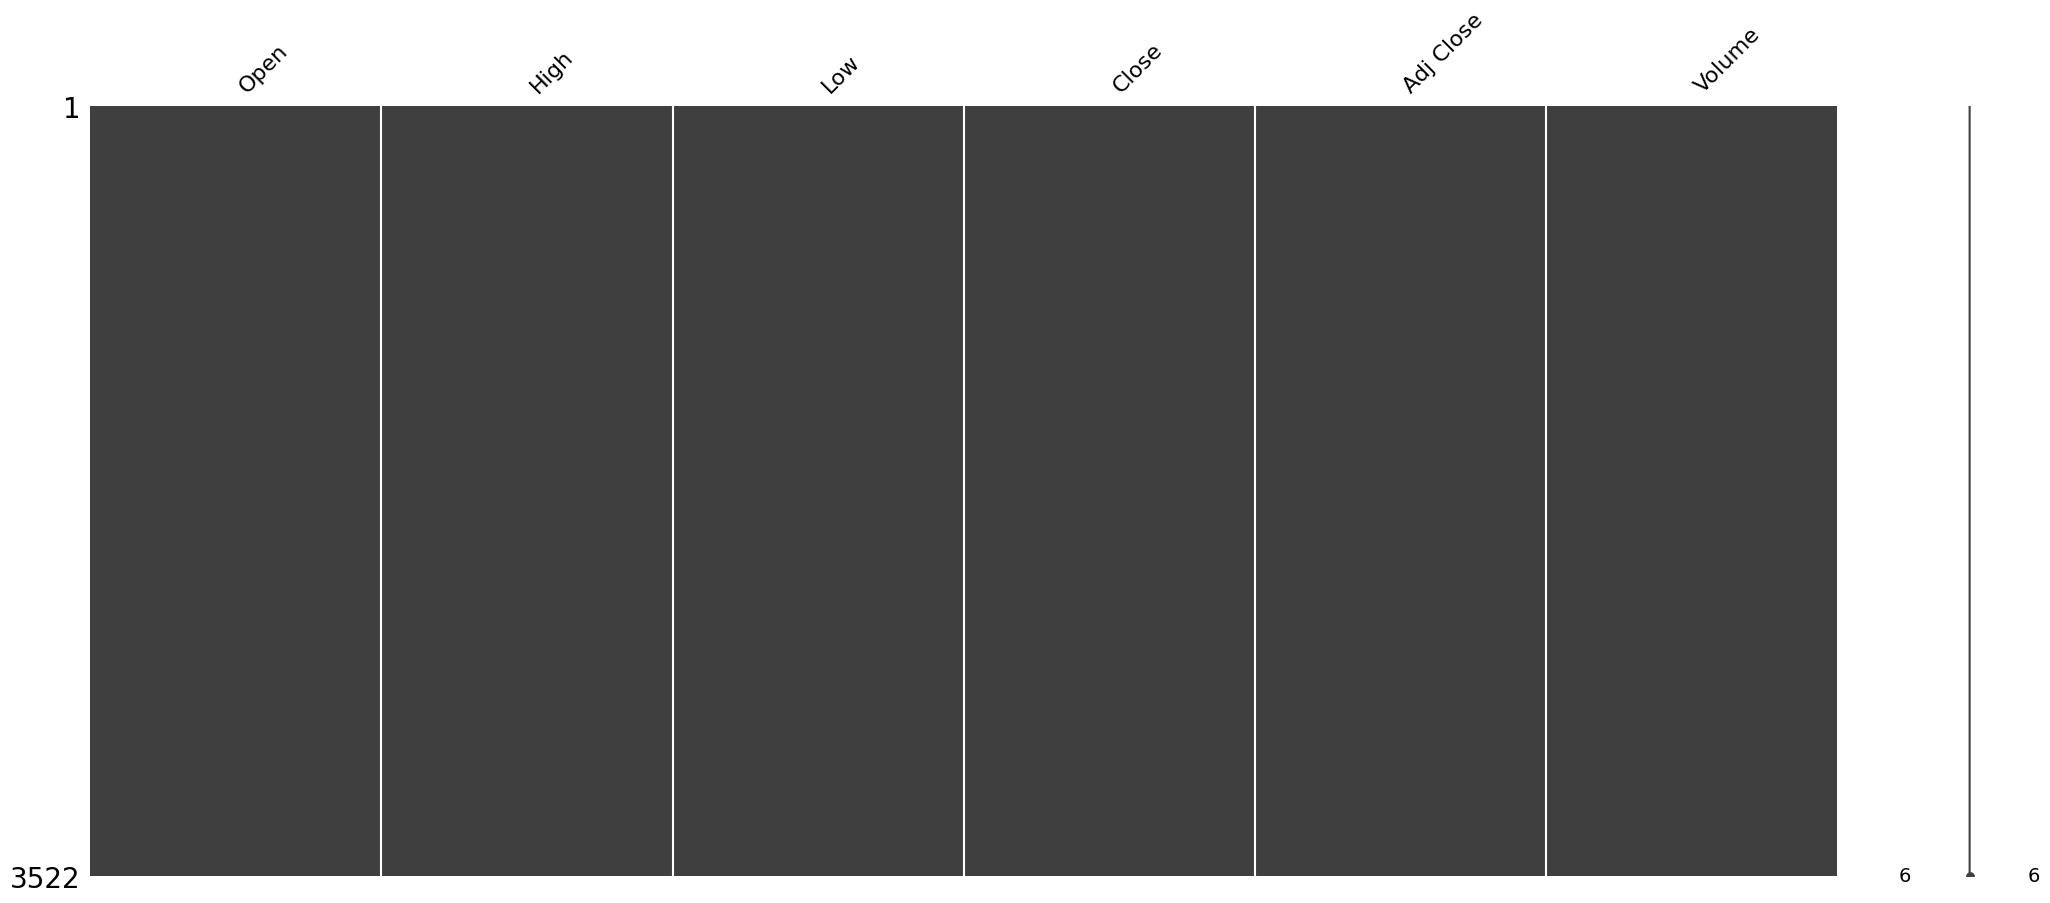

In [108]:
msno.matrix(aapl_data)

In [109]:
scaler = MinMaxScaler(feature_range=(0,1))
aapl_data_scaler = scaler.fit_transform(aapl_data['Close'].values.reshape(-1,1))

In [110]:
x = []
y = []

for i in range(60, len(aapl_data_scaler)):
    x.append(aapl_data_scaler[i-60:i, 0])
    y.append(aapl_data_scaler[i, 0])

In [111]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [112]:
x_train, y_train = np.array(x_train), np.array(y_train)


In [113]:
x_train, x_train.shape

(array([[0.03550867, 0.03657869, 0.03690922, ..., 0.06056735, 0.06169152,
         0.06231711],
        [0.10268476, 0.10625337, 0.10733834, ..., 0.13027938, 0.12995258,
         0.12923364],
        [0.31206923, 0.33712789, 0.32417371, ..., 0.37974204, 0.38485312,
         0.38680081],
        ...,
        [0.21295866, 0.20972992, 0.21384754, ..., 0.25921984, 0.26120674,
         0.26384726],
        [0.03460671, 0.03390643, 0.03009507, ..., 0.03841621, 0.03894469,
         0.03970845],
        [0.65589737, 0.66468159, 0.66321755, ..., 0.74306027, 0.74609294,
         0.73861581]]),
 (2769, 60))

In [114]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

In [115]:
x_train.shape

(2769, 60, 1)

In [116]:
model = Sequential([
    layers.LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    layers.Dropout(0.2),  # Add dropout after the first LSTM layer
    layers.BatchNormalization(),  # Add batch normalization after the dropout layer
    layers.LSTM(units=50, return_sequences=True),
    layers.Dropout(0.2),  # Add dropout after the second LSTM layer
    layers.BatchNormalization(),  # Add batch normalization after the dropout layer
    layers.Flatten(),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')



e:\Data_Science\Perso_project\Trading_prediction\.conda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [117]:
model.summary()

Model: "sequential_46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_101 (LSTM)                 │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 60, 50)         │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_102 (LSTM)                 │ (None, 60, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 60, 50)         │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 3000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │         3,001 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,001 (132.82 KB)

 Trainable params: 33,801 (132.04 KB)

 Non-trainable params: 200 (800.00 B)

In [119]:
from keras import callbacks

early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(x_train, y_train, epochs=100, batch_size=25, validation_split=0.2, callbacks=[early_stopping])



Epoch 1/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 1.3030 - val_loss: 0.1112
Epoch 2/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.4929 - val_loss: 0.0943
Epoch 3/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.3774 - val_loss: 0.2515
Epoch 4/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.3340 - val_loss: 0.2861
Epoch 5/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.3633 - val_loss: 0.6185
Epoch 6/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.3616 - val_loss: 0.3023
Epoch 7/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.3706 - val_loss: 0.0149
Epoch 8/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1648 - val_loss: 0.0610
Epoch 9/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1860 - val_loss: 0.0859
Epoch 10/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1824 - val_loss: 0.1458
Epoch 11/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1563 - val_loss: 0.0016
Epoch 12/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step

In [120]:
# Convert X_test and y_test to Numpy arrays if they are not already
X_test = np.array(x_test)
y_test = np.array(y_test)

# Ensure X_test is reshaped similarly to how X_train was reshaped
# This depends on how you preprocessed the training data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Now evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)
print("Test Loss: ", test_loss)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0074
Test Loss:  0.007656436413526535


In [121]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Making predictions
y_pred = model.predict(X_test)

# Calculating MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Mean Absolute Error: ", mae)
print("Root Mean Square Error: ", rmse)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
Mean Absolute Error:  0.08170493543219252
Root Mean Square Error:  0.08750106137148018


e:\Data_Science\Perso_project\Trading_prediction\.conda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[*********************100%%**********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━

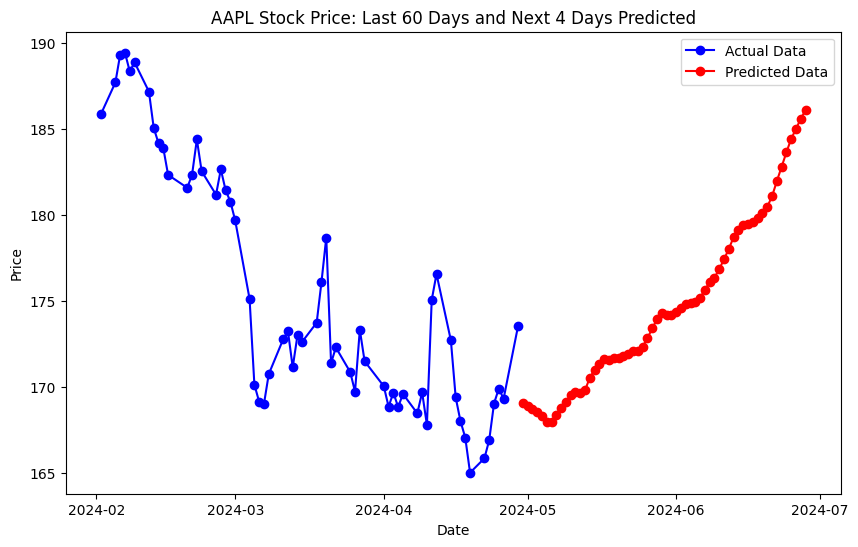

In [123]:
import pandas as pd
import mplfinance as mpf
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt

# Fetch the latest 60 days of AAPL stock data
data = yf.download('AAPL', period='180d', interval='1d') # Fetch 64 days to display last 60 days in the chart

# Select 'Close' price and scale it
closing_prices = data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_prices)

# Predict the next 4 days iteratively
predicted_prices = []
current_batch = scaled_data[-60:].reshape(1, 60, 1)  # Most recent 60 days

for i in range(60):  # Predicting 4 days
    next_prediction = model.predict(current_batch)
    next_prediction_reshaped = next_prediction.reshape(1, 1, 1)
    current_batch = np.append(current_batch[:, 1:, :], next_prediction_reshaped, axis=1)
    predicted_prices.append(scaler.inverse_transform(next_prediction)[0, 0])

# Creating a list of dates for the predictions
last_date = data.index[-1]
next_day = last_date + pd.Timedelta(days=1)
prediction_dates = pd.date_range(start=next_day, periods=60)

# Adding predictions to the DataFrame
predicted_data = pd.DataFrame(index=prediction_dates, data=predicted_prices, columns=['Close'])

# Combining both actual and predicted data
combined_data = pd.concat([data['Close'], predicted_data['Close']])
combined_data = combined_data[-64:] # Last 60 days of actual data + 4 days of predictions

# Plotting the actual data
plt.figure(figsize=(10,6))
plt.plot(data.index[-60:], data['Close'][-60:], linestyle='-', marker='o', color='blue', label='Actual Data')

# Plotting the predicted data
plt.plot(prediction_dates, predicted_prices, linestyle='-', marker='o', color='red', label='Predicted Data')

plt.title("AAPL Stock Price: Last 60 Days and Next 4 Days Predicted")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()